In [58]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [69]:
heating_load_raw = pd.read_csv("~\\Documents\\UNSW\\2022H5 Data mining and Machine Learning\\\week_3\heating\ENB2012_data.csv", header=None, names=["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"])



In [52]:
diabetes_raw = pd.read_csv("~\\Documents\\UNSW\\2022H5 Data mining and Machine Learning\\week_3\diabetes\pima-indians-diabetes.csv", delimiter=",", header=None, names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"])

In [70]:
heating_load_raw.describe(include='all')

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [71]:
heating_load_raw.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [72]:
heating_load_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


array([[<AxesSubplot:title={'center':'Relative Compactness'}>,
        <AxesSubplot:title={'center':'Surface Area'}>,
        <AxesSubplot:title={'center':'Wall Area'}>],
       [<AxesSubplot:title={'center':'Roof Area'}>,
        <AxesSubplot:title={'center':'Overall Height'}>,
        <AxesSubplot:title={'center':'Orientation'}>],
       [<AxesSubplot:title={'center':'Glazing Area'}>,
        <AxesSubplot:title={'center':'Glazing Area Distribution'}>,
        <AxesSubplot:title={'center':'Heating Load'}>],
       [<AxesSubplot:title={'center':'Cooling Load'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

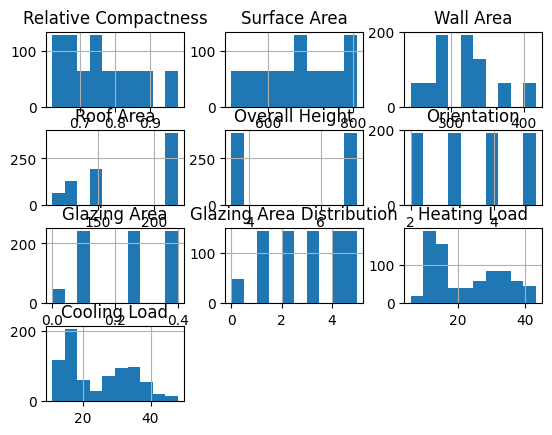

In [78]:
heating_load_raw.hist()

In [81]:
heating_load_raw['Orientation'].value_counts()

2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64

In [82]:
from sklearn.preprocessing import OneHotEncoder
heating_cat = heating_load_raw[['Orientation', 'Overall Height', 'Glazing Area', 'Glazing Area Distribution']]
cat_encoder = OneHotEncoder()
heating_cat_1hot = cat_encoder.fit_transform(heating_cat)
heating_cat_1hot

<768x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3072 stored elements in Compressed Sparse Row format>

In [83]:
cat_encoder.categories_

[array([2, 3, 4, 5], dtype=int64),
 array([3.5, 7. ]),
 array([0.  , 0.1 , 0.25, 0.4 ]),
 array([0, 1, 2, 3, 4, 5], dtype=int64)]

In [73]:
target_var = ["Heating Load", "Cooling Load"]
X_labels = list(set(heating_load_raw.columns)-set(heating_load_raw[target_var]))
X = heating_load_raw[X_labels].values
y = heating_load_raw[target_var].values

In [74]:
X

array([[7.0000e+00, 1.1025e+02, 2.0000e+00, ..., 9.8000e-01, 0.0000e+00,
        5.1450e+02],
       [7.0000e+00, 1.1025e+02, 3.0000e+00, ..., 9.8000e-01, 0.0000e+00,
        5.1450e+02],
       [7.0000e+00, 1.1025e+02, 4.0000e+00, ..., 9.8000e-01, 0.0000e+00,
        5.1450e+02],
       ...,
       [3.5000e+00, 2.2050e+02, 3.0000e+00, ..., 6.2000e-01, 4.0000e-01,
        8.0850e+02],
       [3.5000e+00, 2.2050e+02, 4.0000e+00, ..., 6.2000e-01, 4.0000e-01,
        8.0850e+02],
       [3.5000e+00, 2.2050e+02, 5.0000e+00, ..., 6.2000e-01, 4.0000e-01,
        8.0850e+02]])

In [57]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.3, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [66]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

diabetes_predictions = lin_reg.predict(X_train)
lin_rmse = sqrt(mean_squared_error(y_train, diabetes_predictions))
lin_rmse

0.39521034462152665

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, )